In [1]:
#!pip install numpy
#!pip install scipy
#!pip install torch
#!pip install torch_geometric
#!pip install matplotlib
#!pip install scikit-learn
#!pip install pandas
#!pip install git+https://github.com/alitwinkumar/connectome_tools.git

In [ ]:
# Install required packages.
import os
import torch
import numpy as np
import pandas as pd
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

# Helper function for visualization.
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
    

2.6.0


In [ ]:
def visualize(h, color):
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())

    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])

    plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")
    plt.show()

In [ ]:
from connectome_tools import load_flywire
# Use connectome_loaders to import FlyWire neurons 
neurons, _ = load_flywire('FlyWire_data/') # datapath to FlyWire 
neurons

,root_id,group,nt_type,nt_type_score,da_avg,ser_avg,gaba_avg,glut_avg,ach_avg,oct_avg,...,class,sub_class,cell_type,hemibrain_type,hemilineage,side,nerve,J_idx,J_idx_post,J_idx_pre
0,720575940596125868,LO.LOP,ACH,0.57,0.03,0.00,0.05,0.28,0.57,0.07,...,NaN,NaN,T5c,NaN,NaN,right,NaN,0,0,0
1,720575940597856265,ME,ACH,0.85,0.01,0.00,0.03,0.04,0.85,0.07,...,NaN,NaN,Tm16,NaN,NaN,right,NaN,1,1,1
2,720575940597944841,ME.LO,ACH,0.82,0.02,0.00,0.01,0.05,0.82,0.09,...,NaN,NaN,CB3851,NaN,NaN,right,NaN,2,2,2
3,720575940598267657,ME,GABA,0.74,0.01,0.01,0.74,0.19,0.03,0.02,...,NaN,NaN,TmY15,NaN,NaN,right,NaN,3,3,3
4,720575940599333574,ME,ACH,0.61,0.02,0.00,0.13,0.13,0.61,0.11,...,NaN,NaN,Tm1,NaN,NaN,right,NaN,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139250,720575940661335681,GNG,GABA,0.71,0.00,0.00,0.71,0.17,0.11,0.00,...,NaN,NaN,CB0180,NaN,MX12__prim,left,NaN,139250,139250,139250
139251,720575940661336193,ME.LO,ACH,0.62,0.02,0.00,0.18,0.16,0.62,0.03,...,NaN,NaN,TmY3,NaN,NaN,left,NaN,139251,139251,139251
139252,720575940661337217,SCL.MB_ML,ACH,1.00,0.00,0.00,0.00,0.00,1.00,0.00,...,Kenyon_Cell,NaN,NaN,KCab-p,MBp4,left,NaN,139252,139252,139252
139253,720575940661338497,GNG,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,NaN,NaN,CB0904,NaN,putative_primary,right,PhN,139253,139253,139253


## neurons = _attempt_load("neurons.csv")
## lassif = _attempt_load("classification.csv")
## conns = _attempt_load("connections.csv")
## coordinates = _attempt_load('coordinates.csv')
## syn_coordinates = _attempt_load('synapse_coordinates.csv')

In [111]:
neurons.columns


Index(['root_id', 'group', 'nt_type', 'nt_type_score', 'da_avg', 'ser_avg',
       'gaba_avg', 'glut_avg', 'ach_avg', 'oct_avg', 'flow', 'super_class',
       'class', 'sub_class', 'cell_type', 'hemibrain_type', 'hemilineage',
       'side', 'nerve', 'J_idx', 'J_idx_post', 'J_idx_pre'],
      dtype='object')

In [6]:
# Import FlyWire connections as an edgelist
connections = pd.read_csv('FlyWire_data/connections.csv')
connections

,pre_root_id,post_root_id,neuropil,syn_count,nt_type
0,720575940629970489,720575940631267655,AVLP_R,7,GABA
1,720575940605876866,720575940606514878,LAL_R,15,GABA
2,720575940627737365,720575940628914436,AL_L,32,ACH
3,720575940633587552,720575940626452879,SMP_R,15,ACH
4,720575940616871878,720575940621203973,AVLP_L,13,GABA
...,...,...,...,...,...
3869873,720575940621773517,720575940611139733,PVLP_R,1,ACH
3869874,720575940622734576,720575940609171395,ICL_L,2,ACH
3869875,720575940638466367,720575940627036426,LO_L,5,ACH
3869876,720575940629789660,720575940631553603,GOR_R,3,ACH


In [176]:
cell_stats = pd.read_csv('FlyWire_data/cell_stats.csv')


In [178]:
cell_stats

,root_id,length_nm,area_nm,size_nm
0,720575940596125868,396840,628299136,37616302080
1,720575940597856265,1184013,1634424448,100004290560
2,720575940597944841,784742,1022307072,58954229760
3,720575940598267657,1645960,2346787840,140744601600
4,720575940599333574,575383,1366784768,111170764800
...,...,...,...,...
139241,720575940661333889,1292208,2567808384,194386442240
139242,720575940661335681,3800832,8201410304,745657835520
139243,720575940661336193,854317,1337822848,90069493760
139244,720575940661337217,948687,1959185664,135310899200


In [185]:
neurons['root_id']

86        720575940602849248
104       720575940602974688
126       720575940603152998
127       720575940603167916
140       720575940603231916
                 ...        
138936    720575940660177025
138973    720575940660281217
138984    720575940660313729
139159    720575940661089921
139169    720575940661114753
Name: root_id, Length: 4067, dtype: int64

In [182]:
cell_stats['root_id']

0         720575940596125868
1         720575940597856265
2         720575940597944841
3         720575940598267657
4         720575940599333574
                 ...        
139241    720575940661333889
139242    720575940661335681
139243    720575940661336193
139244    720575940661337217
139245    720575940661339777
Name: root_id, Length: 139246, dtype: int64

In [186]:
# Restrict dataset to a specific neuropil 
neuropil_of_interest = 'LH_L'
connections = connections[connections['neuropil'] == neuropil_of_interest] # Filter connections in edgelist by neuropil of interest

lh_neurons = list(np.unique(list(connections['pre_root_id']) + list(connections['post_root_id']))) # Subselect neurons in neuropil of interest
neurons = neurons[neurons['root_id'].isin(lh_neurons)]
cell_stats = cell_stats[cell_stats['root_id'].isin(neurons['root_id'])]
#cell_stats = cell_stats[neurons['root_id']] # Filter connections in edgelist by neuropil of interest

print('Number of neurons in ' + neuropil_of_interest + ': ' + str(len(neurons)))

Number of neurons in LH_L: 4067


In [187]:
cell_stats

,root_id,length_nm,area_nm,size_nm
86,720575940602849248,939055,1577045632,97058508800
104,720575940602974688,2009104,3871578368,247878727680
126,720575940603152998,850531,1624214400,111268567040
127,720575940603167916,818866,1364631808,82079907840
140,720575940603231916,2202965,6318038016,617312942080
...,...,...,...,...
138928,720575940660177025,1159454,1831047552,94709811200
138965,720575940660281217,2481958,5995685504,494148567040
138976,720575940660313729,2776790,5538599936,364797030400
139151,720575940661089921,7651838,12332130304,896693237760


In [116]:
neurons

,root_id,group,nt_type,nt_type_score,da_avg,ser_avg,gaba_avg,glut_avg,ach_avg,oct_avg,...,class,sub_class,cell_type,hemibrain_type,hemilineage,side,nerve,J_idx,J_idx_post,J_idx_pre
86,720575940602849248,LH.SLP,NaN,0.00,0.01,0.00,0.41,0.46,0.12,0.00,...,NaN,NaN,CB2965,NaN,VLPl4_dorsal,left,NaN,86,86,86
104,720575940602974688,AVLP,ACH,0.80,0.07,0.03,0.04,0.05,0.80,0.00,...,NaN,NaN,CB2377,NaN,LHp2,left,NaN,104,104,104
126,720575940603152998,PLP,GLUT,0.58,0.02,0.00,0.37,0.58,0.03,0.00,...,NaN,NaN,NaN,"WEDPN6B,WEDPN6C",VPNp&v1_posterior,left,NaN,126,126,126
127,720575940603167916,LH.AVLP,GLUT,0.59,0.06,0.01,0.32,0.59,0.01,0.00,...,NaN,NaN,NaN,"AVLP011,AVLP012",VLPl4_dorsal,left,NaN,127,127,127
140,720575940603231916,AL.MB_CA,ACH,0.94,0.01,0.01,0.01,0.01,0.94,0.01,...,ALPN,uniglomerular,NaN,DA1_lPN,ALl1_ventral,left,NaN,140,140,140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138936,720575940660177025,LH.SLP,ACH,0.66,0.20,0.02,0.03,0.09,0.66,0.01,...,NaN,NaN,CB2180,NaN,VLPl2_posterior,left,NaN,138936,138936,138936
138973,720575940660281217,SCL.LH,GABA,0.91,0.00,0.00,0.91,0.05,0.04,0.00,...,NaN,NaN,NaN,AVLP447,ALv1,left,NaN,138973,138973,138973
138984,720575940660313729,GNG.SLP,ACH,0.96,0.03,0.00,0.01,0.00,0.96,0.01,...,NaN,NaN,NaN,SLP237,ALl1_ventral,left,NaN,138984,138984,138984
139159,720575940661089921,PLP.SPS,ACH,0.80,0.07,0.01,0.02,0.09,0.80,0.01,...,NaN,NaN,NaN,PLP209,SMPpv2_ventral,left,NaN,139159,139159,139159


In [134]:
all_neurons = list(neurons['root_id']) # List of neurons in graph
#all_neuron_types = list(neurons['cell_type']) # List of types for each neuron in graph
all_neuron_types = list(neurons['class']) # List of types for each neuron in graph


In [245]:
neurons['class']

86         NaN
104        NaN
126        NaN
127        NaN
140       ALPN
          ... 
138936     NaN
138973     NaN
138984     NaN
139159     NaN
139169    ALPN
Name: class, Length: 4067, dtype: object

In [135]:
# %%
#all_unique_types = np.array((neurons['cell_type'].unique())) # List of unique neuron types in graph
all_unique_types = np.array((neurons['class'].unique())) # List of unique neuron types in graph


In [136]:
all_unique_types

array([nan, 'ALPN', 'Kenyon_Cell', 'LHLN', 'AN', 'LHCENT', 'MBON', 'CX',
       'ALIN', 'mAL', 'DAN', 'bilateral', 'MBIN'], dtype=object)

In [137]:

# Node attributes: The cell type of each neuron (this will be represented as a one-hot encoding)
# (num_nodes, num_feats)
node_types = np.zeros((len(all_neurons), len(all_unique_types)))
for i_neuron, neuron in enumerate(all_neurons):
    i_type = np.where(all_unique_types == all_neuron_types[i_neuron])
    assert len(i_type) == 1
    node_types[i_neuron, i_type] = 1
    


In [138]:
# Edge attributes: The strength of connectivity (synaptic count) of each connection
connections = connections.astype({"syn_count": 'float32'})

In [139]:
import networkx as nx

In [140]:
# networkx graph -> PyTorch geometric object transformation is easy
G = nx.DiGraph() # Initialize a networkx directed graph 
G = nx.from_pandas_edgelist(connections, 'pre_root_id', 'post_root_id', ['syn_count'], create_using=nx.DiGraph()) # Create a graph with our node and edge information

In [141]:
# Get unique values from 'Column1'
unique_labels = neurons['nt_type'].unique()

print(unique_labels)

['missing' 'ACH' 'GLUT' 'GABA' 'DA' 'SER' 'OCT']


In [142]:
import pandas as pd


In [143]:
neurons.loc[:, 'nt_type'] = neurons['nt_type'].fillna('missing')

In [246]:
neurons.loc[:, 'class'] = neurons['class'].fillna('missing')

In [247]:
neurons.loc[:, 'class']

86        missing
104       missing
126       missing
127       missing
140          ALPN
           ...   
138936    missing
138973    missing
138984    missing
139159    missing
139169       ALPN
Name: class, Length: 4067, dtype: object

In [144]:
neurons['nt_type']

86        missing
104           ACH
126          GLUT
127          GLUT
140           ACH
           ...   
138936        ACH
138973       GABA
138984        ACH
139159        ACH
139169        ACH
Name: nt_type, Length: 4067, dtype: object

In [145]:
cat = pd.Categorical(neurons['nt_type'])

print(cat)
print(cat.codes)     # Numeric codes
print(cat.categories)  # Category labels

['missing', 'ACH', 'GLUT', 'GLUT', 'ACH', ..., 'ACH', 'GABA', 'ACH', 'ACH', 'ACH']
Length: 4067
Categories (7, object): ['ACH', 'DA', 'GABA', 'GLUT', 'OCT', 'SER', 'missing']
[6 0 3 ... 0 0 0]
Index(['ACH', 'DA', 'GABA', 'GLUT', 'OCT', 'SER', 'missing'], dtype='object')


In [249]:
pd.Categorical(neurons['class']).codes

array([12, 12, 12, ..., 12, 12,  1], shape=(4067,), dtype=int8)

In [146]:
from torch_geometric.utils.convert import from_networkx

In [147]:
#neurons

In [148]:
import numpy as np

In [367]:
# Convert graph into PyTorch geometric object
graph = from_networkx(G, group_edge_attrs=['syn_count']) # Add edge attributes from networkx graph

feat1 = torch.from_numpy(cell_stats['length_nm'].to_numpy()).float().unsqueeze(1)
feat2 = torch.from_numpy(cell_stats['area_nm'].to_numpy()).float().unsqueeze(1)
feat3 = torch.from_numpy(pd.Categorical(neurons['class']).codes).long().unsqueeze(1)
feat4 = torch.from_numpy(pd.Categorical(neurons['nt_type']).codes).float().unsqueeze(1)

#graph.x = torch.cat([feat1, feat2, feat3, feat4], dim=1)
graph.x = torch.cat([feat4], dim=1)
#graph.x = torch.from_numpy(cell_stats['length_nm'].to_numpy()).float().unsqueeze(1)
#graph.x = torch.from_numpy(node_types).float() # Add node attributes (one-hot encoded cell type)


In [368]:
graph.y = torch.from_numpy(pd.Categorical(neurons['nt_type']).codes).long()

In [369]:
graph.x.shape

torch.Size([4067, 1])

In [370]:
num_features = graph.x.shape[1]
num_classes = len(np.unique(graph.y))
num_nodes = graph.x.shape[0]

In [371]:
num_features

1

In [372]:
num_nodes

4067

In [373]:
num_classes

7

In [374]:
train_ratio = 0.7  # 70% of nodes for training

# Create train and test masks
num_train = int(train_ratio * num_nodes)
train_mask = torch.zeros(num_nodes, dtype=torch.bool)
test_mask = torch.zeros(num_nodes, dtype=torch.bool)

# Assign random train and test nodes
perm = torch.randperm(num_nodes)
train_mask[perm[:num_train]] = True
test_mask[perm[num_train:]] = True

# Create PyG Data object
#data = Data(x=hidden_states, edge_index=edge_index, y=y2, train_mask=train_mask, test_mask=test_mask, edge_attr=edge_attr)
#data = Data(x=hidden_states.detach(), edge_index=edge_index, y=y2, train_mask=train_mask, test_mask=test_mask)


In [375]:
graph.train_mask = train_mask # Add node attributes (one-hot encoded cell type)
graph.test_mask = test_mask # Add node attributes (one-hot encoded cell type)


In [396]:
from torch_geometric.transforms import NormalizeFeatures

transform = NormalizeFeatures()
graph = transform(graph)

In [397]:
# Show all column labels
column_labels = neurons.columns

print(column_labels)

Index(['root_id', 'group', 'nt_type', 'nt_type_score', 'da_avg', 'ser_avg',
       'gaba_avg', 'glut_avg', 'ach_avg', 'oct_avg', 'flow', 'super_class',
       'class', 'sub_class', 'cell_type', 'hemibrain_type', 'hemilineage',
       'side', 'nerve', 'J_idx', 'J_idx_post', 'J_idx_pre'],
      dtype='object')


In [398]:
from torch_geometric.transforms import NormalizeFeatures

In [399]:
from torch_geometric.data import Data
from torch_geometric.utils import to_dense_adj

In [400]:
from torch_geometric.utils import degree

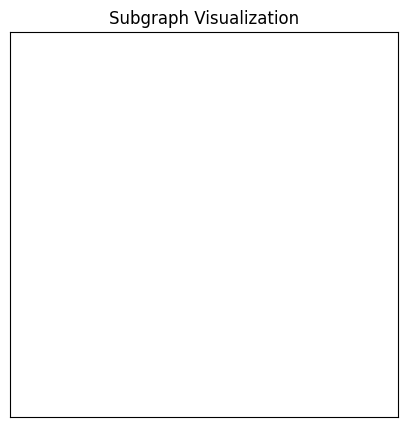

In [401]:
from torch_geometric.utils import subgraph, to_networkx
import networkx as nx

# Draw subgraph
plt.figure(figsize=(5, 5))
#nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray", node_size=100, font_size=8)
plt.xticks([])
plt.yticks([])
plt.title("Subgraph Visualization")
plt.show()

## Training a Multi-layer Perception Network (MLP)

In theory, we should be able to infer the category of a neuron solely based on its content, *i.e.* its actvity feature representation, without taking any relational information into account.

Let's verify that by constructing a simple MLP that solely operates on input node features (using shared weights across all nodes):

In [402]:
import torch
from torch.nn import Linear
import torch.nn.functional as F


class MLP(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        torch.manual_seed(12345)
        self.lin1 = Linear(num_features, hidden_channels)
        self.lin2 = Linear(hidden_channels, num_classes)

    def forward(self, x):
        x = self.lin1(x)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin2(x)
        return x

model = MLP(hidden_channels=16)
print(model)

MLP(
  (lin1): Linear(in_features=1, out_features=16, bias=True)
  (lin2): Linear(in_features=16, out_features=7, bias=True)
)


Our MLP is defined by two linear layers and enhanced by [ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html?highlight=relu#torch.nn.ReLU) non-linearity and [dropout](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html?highlight=dropout#torch.nn.Dropout).
Here, we first reduce the 1433-dimensional feature vector to a low-dimensional embedding (`hidden_channels=16`), while the second linear layer acts as a classifier that should map each low-dimensional node embedding to one of the 7 classes.

Let's train our simple MLP by following a similar procedure as described in [the first part of this tutorial](https://colab.research.google.com/drive/1h3-vJGRVloF5zStxL5I0rSy4ZUPNsjy8).
We again make use of the **cross entropy loss** and **Adam optimizer**.
This time, we also define a **`test` function** to evaluate how well our final model performs on the test node set (which labels have not been observed during training).

In [403]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = MLP(hidden_channels=16)
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)  # Define optimizer.

def train():
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out = model(graph.x)  # Perform a single forward pass.
      loss = criterion(out[graph.train_mask], graph.y[graph.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss

def test():
      model.eval()
      out = model(graph.x)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[graph.test_mask] == graph.y[graph.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(graph.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc

for epoch in range(1, 1001):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

<IPython.core.display.Javascript object>

Epoch: 001, Loss: 2.0992
Epoch: 002, Loss: 2.0268
Epoch: 003, Loss: 1.9673
Epoch: 004, Loss: 1.9169
Epoch: 005, Loss: 1.8680
Epoch: 006, Loss: 1.8270
Epoch: 007, Loss: 1.7700
Epoch: 008, Loss: 1.7204
Epoch: 009, Loss: 1.6763
Epoch: 010, Loss: 1.6316
Epoch: 011, Loss: 1.5899
Epoch: 012, Loss: 1.5558
Epoch: 013, Loss: 1.5088
Epoch: 014, Loss: 1.4735
Epoch: 015, Loss: 1.4497
Epoch: 016, Loss: 1.4179
Epoch: 017, Loss: 1.3974
Epoch: 018, Loss: 1.3520
Epoch: 019, Loss: 1.3398
Epoch: 020, Loss: 1.3039
Epoch: 021, Loss: 1.2688
Epoch: 022, Loss: 1.2394
Epoch: 023, Loss: 1.2052
Epoch: 024, Loss: 1.1820
Epoch: 025, Loss: 1.1605
Epoch: 026, Loss: 1.1306
Epoch: 027, Loss: 1.1049
Epoch: 028, Loss: 1.0893
Epoch: 029, Loss: 1.0647
Epoch: 030, Loss: 1.0484
Epoch: 031, Loss: 1.0371
Epoch: 032, Loss: 0.9969
Epoch: 033, Loss: 0.9855
Epoch: 034, Loss: 0.9679
Epoch: 035, Loss: 0.9430
Epoch: 036, Loss: 0.9145
Epoch: 037, Loss: 0.9009
Epoch: 038, Loss: 0.8784
Epoch: 039, Loss: 0.8639
Epoch: 040, Loss: 0.8477


After training the model, we can call the `test` function to see how well our model performs on unseen labels.
Here, we are interested in the accuracy of the model, *i.e.*, the ratio of correctly classified nodes:

In [404]:
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.8337


## Training a Graph Neural Network (GNN)

We can easily convert our MLP to a GNN by swapping the `torch.nn.Linear` layers with PyG's GNN operators.

Following-up on [the first part of this tutorial](https://colab.research.google.com/drive/1h3-vJGRVloF5zStxL5I0rSy4ZUPNsjy8), we replace the linear layers by the [`GCNConv`](https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.conv.GCNConv) module.
To recap, the **GCN layer** ([Kipf et al. (2017)](https://arxiv.org/abs/1609.02907)) is defined as

$$
\mathbf{x}_v^{(\ell + 1)} = \mathbf{W}^{(\ell + 1)} \sum_{w \in \mathcal{N}(v) \, \cup \, \{ v \}} \frac{1}{c_{w,v}} \cdot \mathbf{x}_w^{(\ell)}
$$

where $\mathbf{W}^{(\ell + 1)}$ denotes a trainable weight matrix of shape `[num_output_features, num_input_features]` and $c_{w,v}$ refers to a fixed normalization coefficient for each edge.
In contrast, a single `Linear` layer is defined as

$$
\mathbf{x}_v^{(\ell + 1)} = \mathbf{W}^{(\ell + 1)} \mathbf{x}_v^{(\ell)}
$$

which does not make use of neighboring node information.

In [405]:
#GAT GIN?
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        torch.manual_seed(1234567)
        self.conv1 = GCNConv(num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return x

model = GCN(hidden_channels=16)
print(model)

GCN(
  (conv1): GCNConv(1, 16)
  (conv2): GCNConv(16, 7)
)


Let's visualize the node embeddings of our **untrained** GCN network.
For visualization, we make use of [**TSNE**](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) to embed our 7-dimensional node embeddings onto a 2D plane.

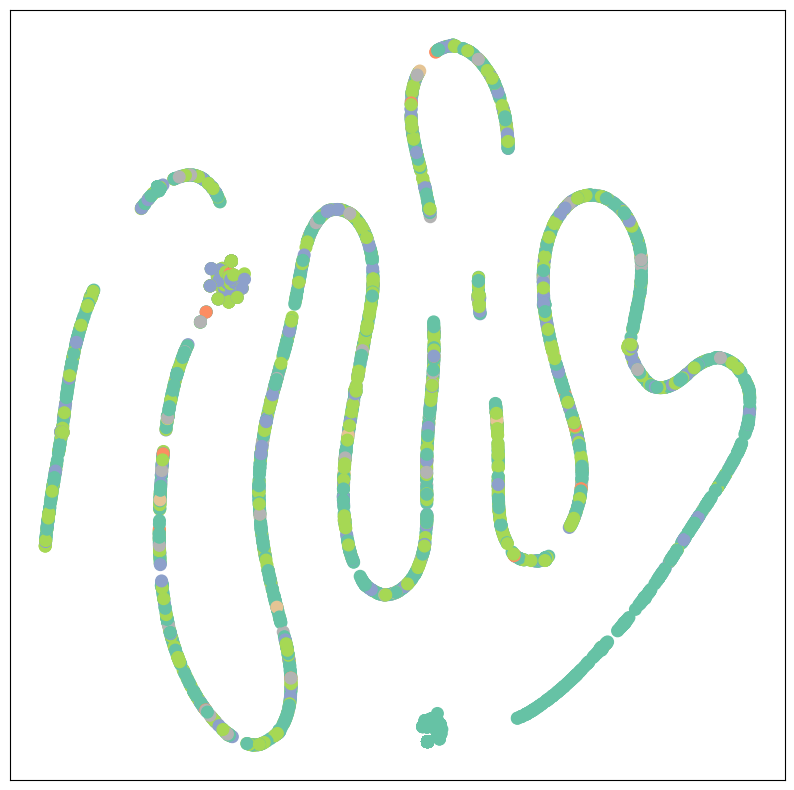

In [406]:
model = GCN(hidden_channels=16)
model.eval()

out = model(graph.x, graph.edge_index)
visualize(out, color=graph.y)

We certainly can do better by training our model.
The training and testing procedure is once again the same, but this time we make use of the node features `x` **and** the graph connectivity `edge_index` as input to our GCN model.

In [407]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = GCN(hidden_channels=16)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

def train():
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out = model(graph.x, graph.edge_index)  # Perform a single forward pass.
      loss = criterion(out[graph.train_mask], graph.y[graph.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss

def test():
      model.eval()
      out = model(graph.x, graph.edge_index)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[graph.test_mask] == graph.y[graph.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(graph.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc


for epoch in range(1, 1001):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

<IPython.core.display.Javascript object>

Epoch: 001, Loss: 1.9885
Epoch: 002, Loss: 1.9517
Epoch: 003, Loss: 1.9152
Epoch: 004, Loss: 1.8790
Epoch: 005, Loss: 1.8475
Epoch: 006, Loss: 1.8187
Epoch: 007, Loss: 1.7863
Epoch: 008, Loss: 1.7559
Epoch: 009, Loss: 1.7215
Epoch: 010, Loss: 1.6964
Epoch: 011, Loss: 1.6624
Epoch: 012, Loss: 1.6303
Epoch: 013, Loss: 1.6067
Epoch: 014, Loss: 1.5754
Epoch: 015, Loss: 1.5481
Epoch: 016, Loss: 1.5240
Epoch: 017, Loss: 1.5087
Epoch: 018, Loss: 1.4801
Epoch: 019, Loss: 1.4595
Epoch: 020, Loss: 1.4390
Epoch: 021, Loss: 1.4195
Epoch: 022, Loss: 1.4098
Epoch: 023, Loss: 1.3827
Epoch: 024, Loss: 1.3814
Epoch: 025, Loss: 1.3624
Epoch: 026, Loss: 1.3531
Epoch: 027, Loss: 1.3340
Epoch: 028, Loss: 1.3247
Epoch: 029, Loss: 1.3112
Epoch: 030, Loss: 1.3039
Epoch: 031, Loss: 1.2963
Epoch: 032, Loss: 1.2793
Epoch: 033, Loss: 1.2718
Epoch: 034, Loss: 1.2670
Epoch: 035, Loss: 1.2518
Epoch: 036, Loss: 1.2538
Epoch: 037, Loss: 1.2449
Epoch: 038, Loss: 1.2346
Epoch: 039, Loss: 1.2322
Epoch: 040, Loss: 1.2236


After training the model, we can check its test accuracy:

In [408]:
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.5692


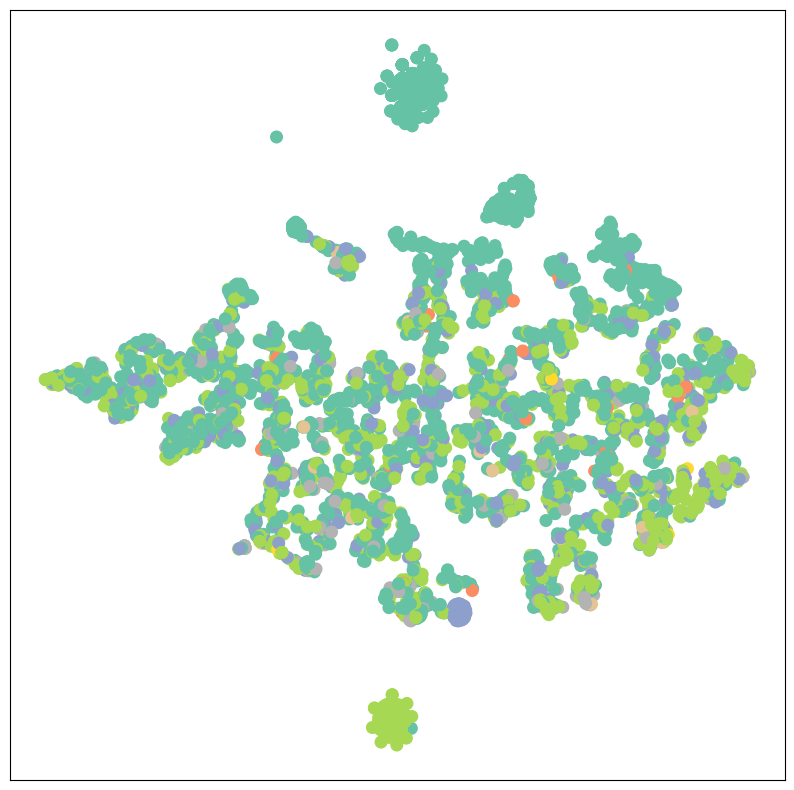

In [390]:
model.eval()

out = model(graph.x, graph.edge_index)
visualize(out, color=graph.y)

In [391]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GATConv

# Assuming num_features and num_classes are defined globally
# e.g., num_features = dataset.num_features, num_classes = dataset.num_classes

class GAT(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        torch.manual_seed(1234567)
        self.conv1 = GATConv(num_features, hidden_channels, heads=8, dropout=0.6)
        # Output dim of conv1 is hidden_channels * heads, so we set in_channels accordingly
        self.conv2 = GATConv(hidden_channels * 8, num_classes, heads=1, concat=False, dropout=0.6)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        return x

model = GAT(hidden_channels=8)
print(model)

GAT(
  (conv1): GATConv(1, 8, heads=8)
  (conv2): GATConv(64, 7, heads=1)
)


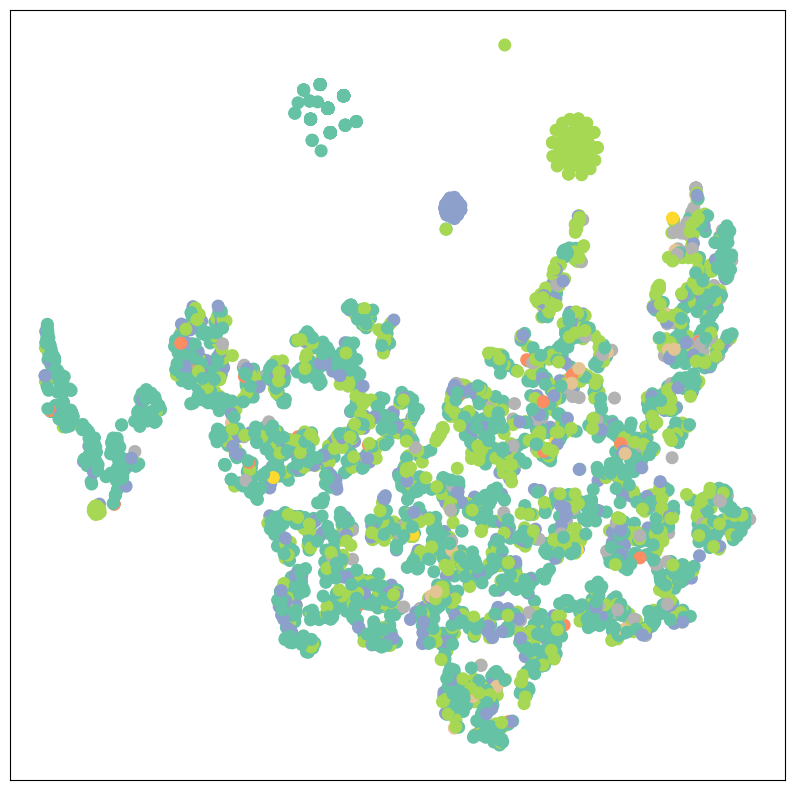

In [392]:
model = GAT(hidden_channels=16)
model.eval()

out = model(graph.x, graph.edge_index)
visualize(out, color=graph.y)

In [393]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = GAT(hidden_channels=16)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

def train():
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out = model(graph.x, graph.edge_index)  # Perform a single forward pass.
      loss = criterion(out[graph.train_mask], graph.y[graph.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss

def test():
      model.eval()
      out = model(graph.x, graph.edge_index)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[graph.test_mask] == graph.y[graph.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(graph.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc


for epoch in range(1, 1001):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

<IPython.core.display.Javascript object>

Epoch: 001, Loss: 2.0958
Epoch: 002, Loss: 1.7676
Epoch: 003, Loss: 1.5890
Epoch: 004, Loss: 1.4895
Epoch: 005, Loss: 1.4280
Epoch: 006, Loss: 1.4125
Epoch: 007, Loss: 1.3913
Epoch: 008, Loss: 1.3715
Epoch: 009, Loss: 1.3917
Epoch: 010, Loss: 1.3711
Epoch: 011, Loss: 1.3782
Epoch: 012, Loss: 1.3227
Epoch: 013, Loss: 1.3325
Epoch: 014, Loss: 1.3016
Epoch: 015, Loss: 1.3054
Epoch: 016, Loss: 1.3245
Epoch: 017, Loss: 1.3384
Epoch: 018, Loss: 1.2709
Epoch: 019, Loss: 1.2807
Epoch: 020, Loss: 1.2854
Epoch: 021, Loss: 1.3002
Epoch: 022, Loss: 1.3014
Epoch: 023, Loss: 1.2972
Epoch: 024, Loss: 1.2781
Epoch: 025, Loss: 1.2762
Epoch: 026, Loss: 1.2452
Epoch: 027, Loss: 1.2582
Epoch: 028, Loss: 1.2683
Epoch: 029, Loss: 1.2771
Epoch: 030, Loss: 1.2702
Epoch: 031, Loss: 1.2417
Epoch: 032, Loss: 1.2341
Epoch: 033, Loss: 1.2498
Epoch: 034, Loss: 1.2399
Epoch: 035, Loss: 1.2224
Epoch: 036, Loss: 1.2291
Epoch: 037, Loss: 1.2456
Epoch: 038, Loss: 1.2379
Epoch: 039, Loss: 1.2354
Epoch: 040, Loss: 1.2257


In [394]:
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.5799


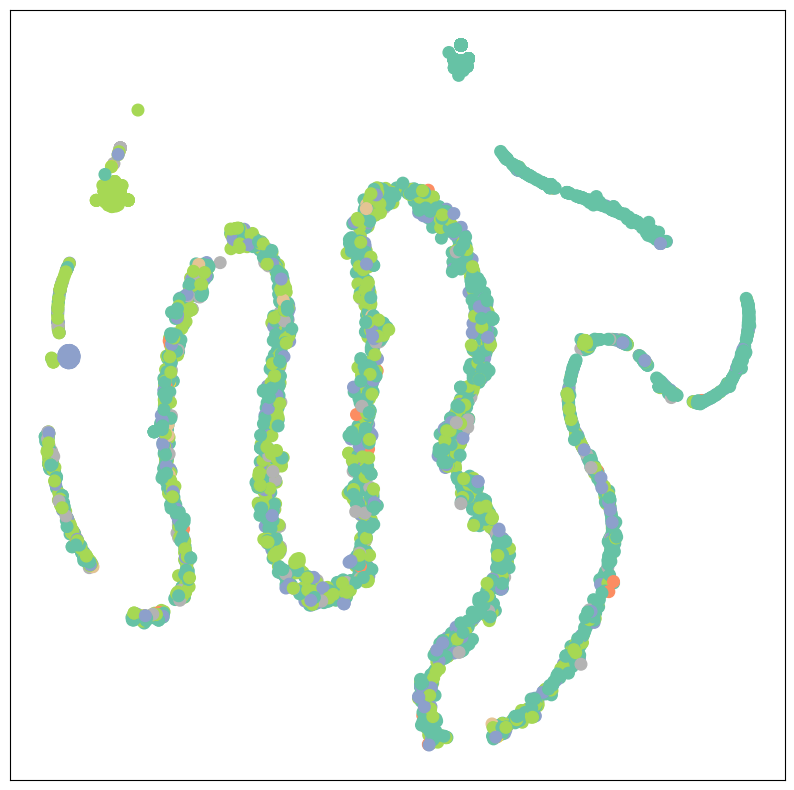

In [395]:
model.eval()

out = model(graph.x, graph.edge_index)
visualize(out, color=graph.y)